# Individual household electric power consumption




Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.


| Key                 | Value                     |
|---------------------|---------------------------|
| Dataset Characteristics | Multivariate, Time-Series |
| Subject Area        | Physical Science          |
| Associated Tasks    | Regression, Clustering    |
| Feature Type        | Real                      |
| Instances           | 2075259                   |
| Features            | 9                         |


https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Download data

First we download the data, it is around 20 MB.

In [ ]:
import requests, zipfile

# download
url = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"
zip_file_path = 'data/individual_household_electric_power_consumption.zip'
response = requests.get(url)
with open(zip_file_path, "wb") as f:
    f.write(response.content)

# unzip
extract_folder = 'extracted_data/'
extract_folder = ''

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Load the Data


In [ ]:
import pandas as pd
dtype_dict = {
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64'  # or 'int64' if all values are integers
}
df = pd.read_csv('/content/household_power_consumption.txt', delimiter=';', na_values='?', dtype=dtype_dict)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
print('Column names:')
print(df.columns)
print('\nDataframe Info:')
print(df.info())

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


# Visualize Data

array([[<Axes: title={'center': 'Global_active_power'}>,
        <Axes: title={'center': 'Global_reactive_power'}>,
        <Axes: title={'center': 'Voltage'}>],
       [<Axes: title={'center': 'Global_intensity'}>,
        <Axes: title={'center': 'Sub_metering_1'}>,
        <Axes: title={'center': 'Sub_metering_2'}>],
       [<Axes: title={'center': 'Sub_metering_3'}>, <Axes: >, <Axes: >]],
      dtype=object)

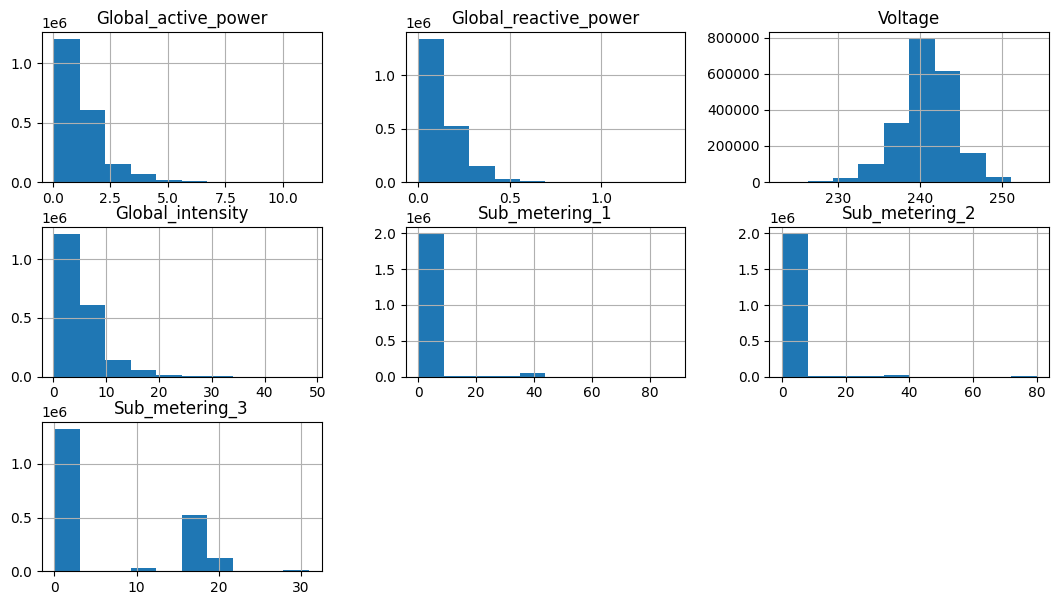

In [ ]:
col_names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[col_names].hist(figsize=(13,7))

<Axes: >

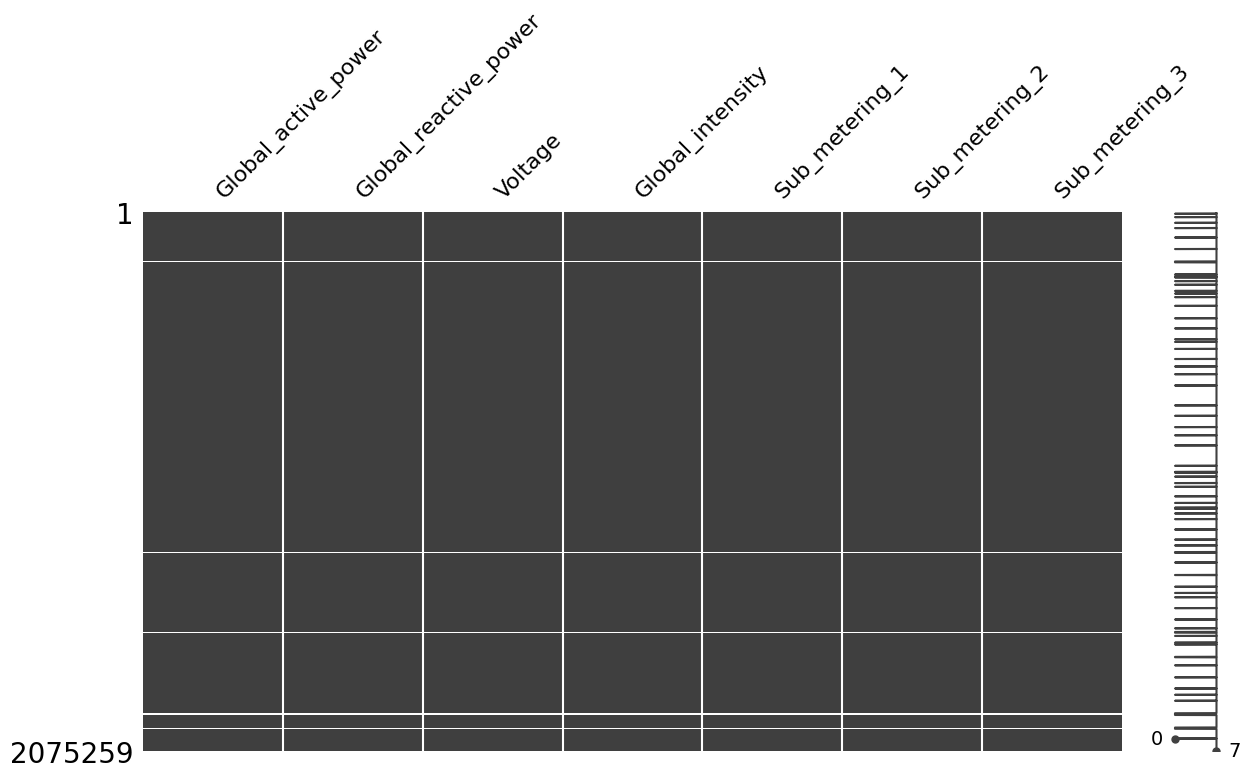

In [ ]:
import missingno
missingno.matrix(df[col_names], figsize=(14,7))

### Visualize the correlation between variables

1) Pearson Correlation (Linear correlation between variables that are distributed in a Gaussian manner)

However, we can see from the histplots that the distributions are not Gaussian.

<Axes: >

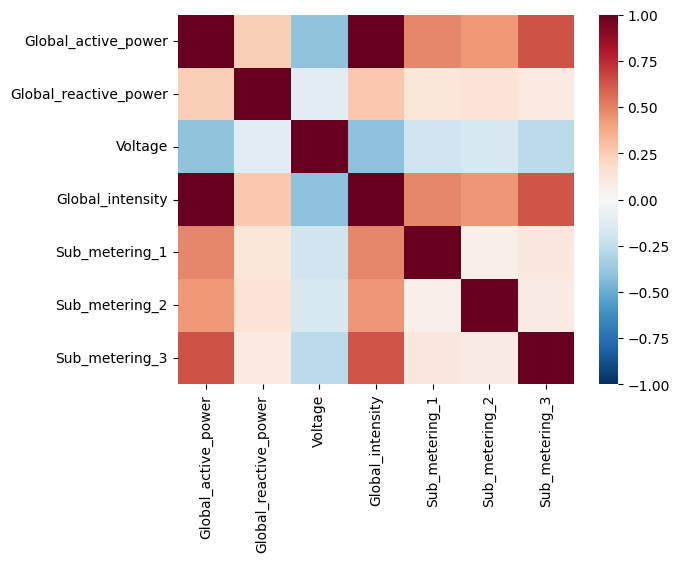

In [ ]:
import seaborn as sns
corr = df[col_names].corr()
sns.heatmap(corr, cmap="RdBu_r", vmin=-1, vmax=1)

2) Another correlation algorithm that is not good only for Normally distributed variables.



### Feature expressiveness

How much information does each feature hold?
We can assess this information by using PCA/SVD and we can also look at it by using Diffusion Maps (https://datafold-dev.gitlab.io/datafold/)


#### PCA

Principle Component Analysis for time series has limited information. This is due to the nature of PCA viewing each time point as iid, meaning that it does not take into account previous or future time points, which in theory convey further information about the current time step that is analyzed.

[4.95290062e-01 2.36095787e-01 1.90919837e-01 5.29705610e-02
 2.46455742e-02 6.95196409e-05 8.65885684e-06]
[13333.61449084  9205.81422384  8278.34678041  4360.49079192
  2974.31908563   157.96899217    55.75044872]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6']


Text(0.5, 1.0, 'Singular Values')

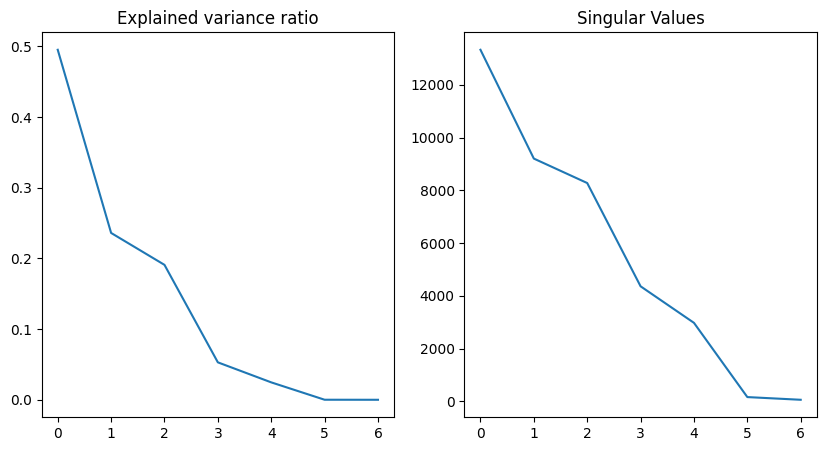

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(df[col_names].ffill().values)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.get_feature_names_out(col_names))
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title('Explained variance ratio')
fig.add_subplot(122)
plt.plot(np.arange(len(pca.singular_values_)), pca.singular_values_)
plt.title('Singular Values')
